## Pretrained BERT Classifier for Sentiment Analysis

This code loads a small BERT model (pre-trained on SST-2 dataset) for sentiment classification.
The model analyzes text and determines if the sentiment is positive or negative. We use
sample sentences to demonstrate the model's capabilities and display both prediction results
and confidence scores.

In [1]:
# Import necessary libraries
import tensorflow as tf
import keras_nlp
import numpy as np

# Check keras and tensorflow versions
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras NLP version: {keras_nlp.__version__}")

# Load a pretrained BERT classifier from Keras NLP
pretrained_classifier = keras_nlp.models.BertClassifier.from_preset(
    "bert_tiny_en_uncased_sst2",  # Sentiment analysis model trained on SST-2 dataset
    num_classes=2
)

# Define some example texts to classify
example_texts = [
    "This movie was fantastic! I really enjoyed it.",
    "The service at this restaurant was terrible.",
    "The weather is quite pleasant today.",
    "I'm feeling rather neutral about this product."
]

# Perform inference with the pretrained classifier
predictions = pretrained_classifier.predict(example_texts)
predicted_classes = np.argmax(predictions, axis=1)

# Display results
for text, pred, pred_class in zip(example_texts, predictions, predicted_classes):
    sentiment = "Positive" if pred_class == 1 else "Negative"
    confidence = pred[pred_class]
    print(f"Text: {text}")
    print(f"Prediction: {sentiment} (Confidence: {confidence:.4f})")
    print("-" * 50)

TensorFlow version: 2.18.0
Keras NLP version: 0.18.1


100%|██████████| 454/454 [00:00<00:00, 770kB/s]


100%|██████████| 2.04k/2.04k [00:00<00:00, 4.90MB/s]


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Text: This movie was fantastic! I really enjoyed it.
Prediction: Negative (Confidence: 0.3307)
--------------------------------------------------
Text: The service at this restaurant was terrible.
Prediction: Positive (Confidence: 0.1450)
--------------------------------------------------
Text: The weather is quite pleasant today.
Prediction: Negative (Confidence: 0.0906)
--------------------------------------------------
Text: I'm feeling rather neutral about this product.
Prediction: Positive (Confidence: 0.1274)
--------------------------------------------------


## Testing the Model with More Examples

Now let's test our classifier with a variety of sentences to see how it handles different types of text. We'll also visualize the confidence scores to better understand the model's certainty about its predictions.

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Text: The plot was predictable but the acting was superb.
Prediction: Positive (Confidence: 0.1323)
--------------------------------------------------
Text: I've never been so disappointed by a product I was excited about.
Prediction: Positive (Confidence: 0.0554)
--------------------------------------------------
Text: It's neither great nor terrible, just average.
Prediction: Positive (Confidence: 0.1344)
--------------------------------------------------
Text: Despite a few flaws, I would recommend this to anyone.
Prediction: Positive (Confidence: 0.0821)
--------------------------------------------------
Text: The book started slow but the ending was worth it.
Prediction: Negative (Confidence: 0.1760)
--------------------------------------------------


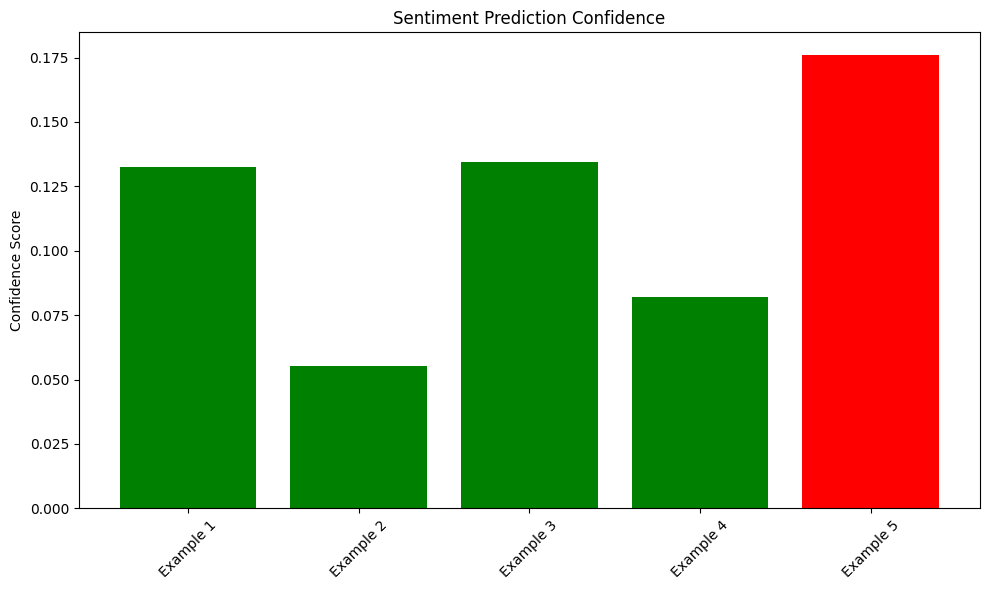

In [2]:
# Let's try more diverse examples
diverse_examples = [
    "The plot was predictable but the acting was superb.",
    "I've never been so disappointed by a product I was excited about.",
    "It's neither great nor terrible, just average.",
    "Despite a few flaws, I would recommend this to anyone.",
    "The book started slow but the ending was worth it."
]

# Get predictions
diverse_predictions = pretrained_classifier.predict(diverse_examples)
diverse_classes = np.argmax(diverse_predictions, axis=1)

# Create a simple visualization of confidence scores
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for i, (text, pred_class, pred) in enumerate(zip(diverse_examples, diverse_classes, diverse_predictions)):
    sentiment = "Positive" if pred_class == 1 else "Negative"
    confidence = pred[pred_class]
    print(f"Text: {text}")
    print(f"Prediction: {sentiment} (Confidence: {confidence:.4f})")
    print("-" * 50)

    # Add to bar chart
    plt.bar(i, confidence, color='green' if pred_class == 1 else 'red')

plt.xticks(range(len(diverse_examples)), [f"Example {i+1}" for i in range(len(diverse_examples))], rotation=45)
plt.ylabel('Confidence Score')
plt.title('Sentiment Prediction Confidence')
plt.tight_layout()
plt.show()